<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-2.8_n20.csv',
 'data_add_delta_-2.8_n30.csv',
 'data_add_delta_-2.8_n60.csv',
 'data_add_delta_-2.8_n120.csv',
 'data_add_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.388351,47.441262,67.569543,0.007262,175.406417,175.396035,0.010382
1,0.0,1.0,46.546518,20.737582,64.046801,-0.007040,141.323861,141.323013,0.000848
2,0.0,2.0,54.344475,77.553251,45.971401,0.002261,187.871388,187.870975,0.000413
3,0.0,3.0,73.623365,30.953358,67.953463,-0.018398,182.511789,182.524432,-0.012643
4,0.0,4.0,22.446195,58.919034,95.699773,0.000470,187.065471,187.064039,0.001432
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.236438,20.426350,31.965467,-0.005993,145.622261,145.627772,-0.005512
19996,999.0,16.0,45.657898,36.880168,21.952023,0.000731,114.490820,114.490455,0.000365
19997,999.0,17.0,27.361679,39.080800,71.776886,0.003237,148.222603,148.223670,-0.001068
19998,999.0,18.0,67.068193,62.190709,48.095741,-0.000032,187.354611,187.353907,0.000705


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    50.388351  47.441262  67.569543  0.007262  175.406417   
      1.0    46.546518  20.737582  64.046801 -0.007040  141.323861   
      2.0    54.344475  77.553251  45.971401  0.002261  187.871388   
      3.0    73.623365  30.953358  67.953463 -0.018398  182.511789   
      4.0    22.446195  58.919034  95.699773  0.000470  187.065471   
...                ...        ...        ...       ...         ...   
999.0 15.0   83.236438  20.426350  31.965467 -0.005993  145.622261   
      16.0   45.657898  36.880168  21.952023  0.000731  114.490820   
      17.0   27.361679  39.080800  71.776886  0.003237  148.222603   
      18.0   67.068193  62.190709  48.095741 -0.000032  187.354611   
      19.0   25.131449  30.616587  55.993539 -0.005594  121.735981   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    175.396035  0.010382  
      1.0    141.323013  0.000848  
      2.0    187.870975  0.000413  
      3.0    182.524432 -0.012643  
      4.0    187.064039  0.001432  
...                 ...       ...  
999.0 15.0   145.627772 -0.005512  
      16.0   114.490455  0.000365  
      17.0   148.223670 -0.001068  
      18.0   187.353907  0.000705  
      19.0   121.745532 -0.009551  

[20000 rows x 7 columns]

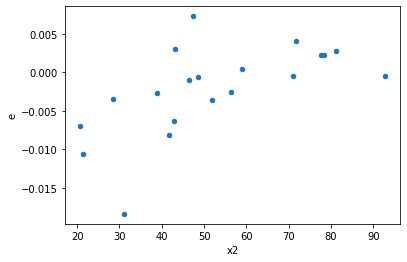

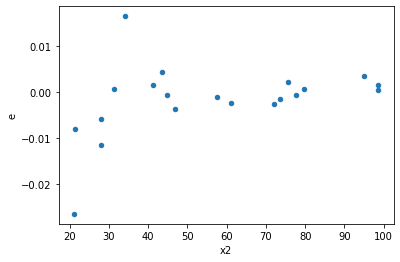

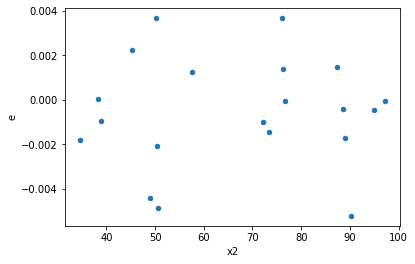

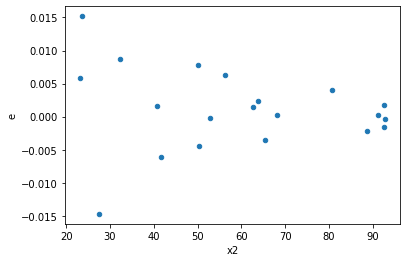

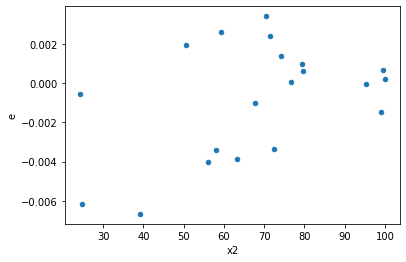

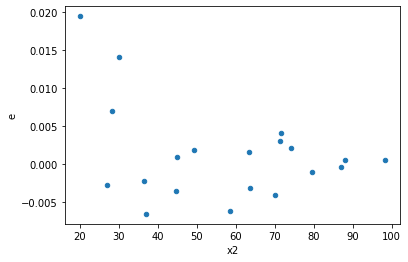

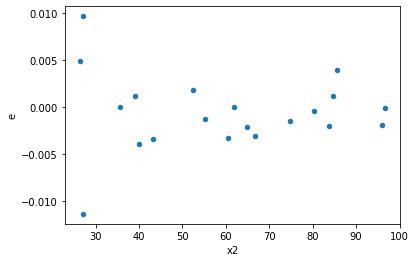

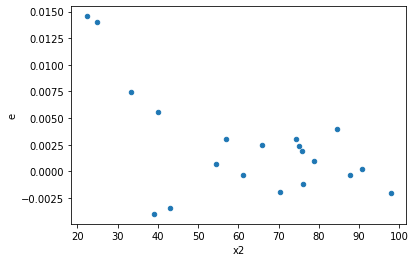

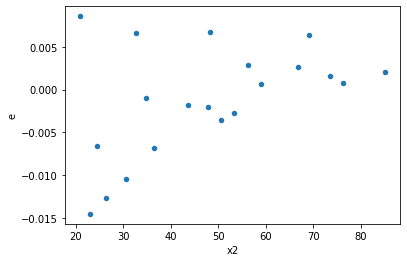

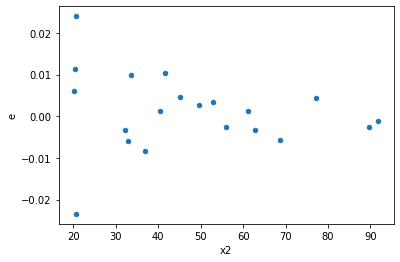

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,5.0,5.0,2.643499641442298e-05,3.756796786047913e-05,5.286999282884596e-06,7.513593572095825e-06,1.421145184645532,0.7091494584076845,0.6454252707961577,0.35457472920384225,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,5.0552171149515255e-05,0.00012420527883423183,1.0110434229903052e-05,2.4841055766846366e-05,2.456972193476656,0.34632351092427793,0.826838244537861,0.17316175546213897,Reject001=1 : Homoscedasticity
8.0,5.0,5.0,8.697018439019928e-05,0.00011111875788234601,1.7394036878039857e-05,2.2223751576469202e-05,1.2776649683045636,0.794577418923804,0.602711290538098,0.397288709461902,Reject001=1 : Homoscedasticity
10.0,5.0,5.0,7.065540784809905e-06,2.675715066014271e-05,1.413108156961981e-06,5.351430132028541e-06,3.786992599019099,0.17023347349857754,0.9148832632507112,0.08511673674928877,Reject001=1 : Homoscedasticity
14.0,5.0,5.0,4.8556580934446985e-05,6.962253558828961e-05,9.711316186889397e-06,1.3924507117657922e-05,1.4338434512570475,0.7021705572158825,0.6489147213920587,0.35108527860794125,Reject001=1 : Homoscedasticity
20.0,5.0,5.0,2.1828072851037874e-05,7.731792811916299e-05,4.365614570207575e-06,1.5463585623832597e-05,3.542132585263325,0.19139124195329504,0.9043043790233525,0.09569562097664752,Reject001=1 : Homoscedasticity
29.0,5.0,5.0,0.00012638832469992608,0.00018143029964123834,2.5277664939985216e-05,3.6286059928247665e-05,1.4354988886196103,0.7012673058269749,0.6493663470865125,0.35063365291348747,Reject001=1 : Homoscedasticity
33.0,5.0,5.0,9.164068826959463e-05,0.00010232782204882678,1.8328137653918928e-05,2.0465564409765355e-05,1.1166199641341847,0.9066058927782397,0.5466970536108802,0.45330294638911983,Reject001=1 : Homoscedasticity
34.0,5.0,5.0,2.498205674006223e-05,2.973363421107403e-05,4.996411348012446e-06,5.946726842214806e-06,1.1901996108827972,0.8531290330722352,0.5734354834638824,0.4265645165361176,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.00024843852325381926,5.1989437873960384e-05,4.968770465076385e-05,1.0397887574792077e-05,0.20926479997164107,0.11112194204014353,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,0.0004523028619225649,7.594441272359989e-05,9.046057238451298e-05,1.5188882544719977e-05,0.16790610698501773,0.07240647387598675,Reject001=1 : Homoscedasticity
2.0,5.0,5.0,5.211164352389874e-05,2.1395334355011272e-05,1.0422328704779749e-05,4.279066871002255e-06,0.41056725346225614,0.3508808302525743,Reject001=1 : Homoscedasticity
3.0,5.0,5.0,0.00047609228320153943,2.8272092314360566e-05,9.521845664030789e-05,5.6544184628721135e-06,0.0593836390798891,0.007602704003746677,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,2.643499641442298e-05,3.756796786047913e-05,5.286999282884596e-06,7.513593572095825e-06,1.421145184645532,0.7091494584076845,Reject001=1 : Homoscedasticity
5.0,5.0,5.0,5.0552171149515255e-05,0.00012420527883423183,1.0110434229903052e-05,2.4841055766846366e-05,2.456972193476656,0.34632351092427793,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,4.447149509536949e-05,4.391324409396399e-05,8.894299019073897e-06,8.782648818792799e-06,0.9874469927262773,0.9892775897813657,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,0.00011961801928284072,1.2056011372049419e-06,2.3923603856568143e-05,2.411202274409884e-07,0.010078758571936044,0.00010690535323531266,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,8.697018439019928e-05,0.00011111875788234601,1.7394036878039857e-05,2.2223751576469202e-05,1.2776649683045636,0.794577418923804,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      825
Reject001=0 : Heteroscedasticity    175
Name: Result_test, dtype: int64